In [5]:
import pandas as pd
import matplotlib.pyplot as plt

Lo primero que debemos hacer es cargar los datos contenidos en la hoja de cálculo, el cual contiene los datos separados por hojas, cada hoja representando los datos de cada año de sde 2004 a 2015

In [6]:
df_04 = pd.read_excel('Euro.Emisiones.Generaciones.xlsx',sheet_name = 0)
df_05 = pd.read_excel('Euro.Emisiones.Generaciones.xlsx',sheet_name = 1)
df_06 = pd.read_excel('Euro.Emisiones.Generaciones.xlsx',sheet_name = 2)
df_07 = pd.read_excel('Euro.Emisiones.Generaciones.xlsx',sheet_name = 3)
df_08 = pd.read_excel('Euro.Emisiones.Generaciones.xlsx',sheet_name = 4)
df_09 = pd.read_excel('Euro.Emisiones.Generaciones.xlsx',sheet_name = 5)
df_10 = pd.read_excel('Euro.Emisiones.Generaciones.xlsx',sheet_name = 6)
df_11 = pd.read_excel('Euro.Emisiones.Generaciones.xlsx',sheet_name = 7)
df_12 = pd.read_excel('Euro.Emisiones.Generaciones.xlsx',sheet_name = 8)
df_13 = pd.read_excel('Euro.Emisiones.Generaciones.xlsx',sheet_name = 9)
df_14 = pd.read_excel('Euro.Emisiones.Generaciones.xlsx',sheet_name = 10)
df_15 = pd.read_excel('Euro.Emisiones.Generaciones.xlsx',sheet_name = 11)

Ahora debemos concatenar todos estos datos para tenerlo en un solo DataFrame, la concatenación de hace de manera vertical, es decir se juntan debajo manteniendo los valores de cada registro en las columnas correspondientes

In [9]:
df = pd.concat([df_04,df_05,df_06,df_07,df_08,df_09,df_10,df_11,df_12,df_13,df_14,df_15])
df.shape

(39966, 15)

En total tenemos cerca de 40000 registros, lo que hace que tengamos suficientes datos para determinar resutados estádisticos acertados

In [10]:
df.head(10)

,MemberState,ReferenceYear,Unique_Plant_ID,PlantName,MWth,Biomass,OtherSolidFuels,LiquidFuels,NaturalGas,OtherGases,SO2,NOx,Dust,Refineries,OtherSector
0,UK,2004,UK0646,A8 gas turbine incl in A1 above,220.0,0.000,0.00,0.000,3339.40400,618.0780,6.000,140.00,0.00,True,NaN
1,UK,2004,UK0645,GTG,86.0,0.000,0.00,0.000,0.00000,693.3324,63.900,78.10,0.89,True,NaN
2,UK,2004,UK0644,"A4, 5, 6 West incl in the A1 above",315.0,0.000,0.00,3214.526,0.00000,3418.9920,716.000,283.00,30.00,True,NaN
3,UK,2004,UK0643,A3 Stage 3/4 included in A1 above,211.0,0.000,0.00,1171.325,0.00000,3130.6130,1099.000,488.00,0.00,True,NaN
4,UK,2004,UK0642,A1 South Stack,172.0,0.000,0.00,1655.478,0.00000,2976.7540,1187.000,586.00,53.00,True,NaN
5,UK,2004,UK0637,Boilers,110.0,0.000,0.00,0.000,0.00000,0.0000,13.860,38.40,0.00,False,NaN
6,UK,2004,UK0636,"SSE Generation, c/o INEOS Enterprises, Runcorn",98.0,0.000,0.00,0.259,4128.11300,0.0000,0.059,16.00,0.00,False,NaN
7,AT,2004,AT0002,"EVN, KW Korneuburg",221.0,0.000,0.00,0.000,756.20932,0.0000,0.000,42.17,0.00,False,NaN
8,UK,2004,UK0635,Plant 17 and fluidised bed plants,270.0,1791.765,2486.52,0.717,826.49500,0.0000,11.900,266.10,21.90,False,NaN
9,UK,2004,UK0634,Mugiemoss Papermill,80.0,0.000,0.00,1.386,1724.31000,2.5020,0.110,106.00,0.00,False,NaN


Algunas de las columnas que tenemos no tienen importancia porque se tratan de nombres de las plantas, o los códigos de estas; la columna **Refineries** no tiene importancia en este caso porque no estamos analizando lo efectos de las refinerías sobre la contaminación

In [11]:
df_model = df.drop(['MemberState','Unique_Plant_ID','PlantName','Refineries','OtherSector'],axis=1)
df_model.columns

Index(['ReferenceYear', 'MWth', 'Biomass', 'OtherSolidFuels', 'LiquidFuels',
       'NaturalGas', 'OtherGases', 'SO2', 'NOx', 'Dust'],
      dtype='object')

In [12]:
df_model.head(10)

,ReferenceYear,MWth,Biomass,OtherSolidFuels,LiquidFuels,NaturalGas,OtherGases,SO2,NOx,Dust
0,2004,220.0,0.000,0.00,0.000,3339.40400,618.0780,6.000,140.00,0.00
1,2004,86.0,0.000,0.00,0.000,0.00000,693.3324,63.900,78.10,0.89
2,2004,315.0,0.000,0.00,3214.526,0.00000,3418.9920,716.000,283.00,30.00
3,2004,211.0,0.000,0.00,1171.325,0.00000,3130.6130,1099.000,488.00,0.00
4,2004,172.0,0.000,0.00,1655.478,0.00000,2976.7540,1187.000,586.00,53.00
5,2004,110.0,0.000,0.00,0.000,0.00000,0.0000,13.860,38.40,0.00
6,2004,98.0,0.000,0.00,0.259,4128.11300,0.0000,0.059,16.00,0.00
7,2004,221.0,0.000,0.00,0.000,756.20932,0.0000,0.000,42.17,0.00
8,2004,270.0,1791.765,2486.52,0.717,826.49500,0.0000,11.900,266.10,21.90
9,2004,80.0,0.000,0.00,1.386,1724.31000,2.5020,0.110,106.00,0.00


FALTA:
    - Mostrar graficas de cajas para ver los datos
    - Comparar la contaminación por cada año
    - comparar la producción de energía por cada año
    - Generar un modelo teniendo como salida cada una de las tres contaminaciones
    - evindeciar las variables que mas afectan las salidas
    - Interpretar si la producción de energía afecta la contaminación

Veamos como están los datos por médio de los estadísticos

In [22]:
df_model.describe()

,ReferenceYear,MWth,Biomass,OtherSolidFuels,LiquidFuels,NaturalGas,OtherGases,SO2,NOx,Dust
count,39966.000000,39370.000000,39966.000000,39966.000000,39966.000000,39966.000000,39966.000000,39966.000000,39966.000000,39966.000000
mean,2009.653806,412.610472,146.031694,2695.368057,289.498457,1409.860155,479.166514,908.804670,490.669358,45.950567
std,3.426876,751.361973,954.256828,13024.125549,1432.656987,3847.543123,2121.270140,6859.705942,1941.749225,311.952968
min,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,87.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000
50%,2010.000000,160.000000,0.000000,0.000000,0.000000,46.338693,0.000000,1.000000,65.900000,0.266000
75%,2013.000000,442.000000,0.000000,0.000000,25.274400,871.824875,0.000000,127.298500,260.000000,7.000000
max,2015.000000,14420.000000,104805.000000,323609.899000,42276.390000,159003.000000,109501.716000,337205.000000,60000.000000,24440.108000


Lo que se puede evindenciar es que las variables **Biomass**, **OtherSolidFuels**, **LiquidFuels**, **OtherGases**, **SO2**, **Dust** no tienen datos medidos en los primeros años, por lo que pueden afectar considereblemenete algun modelo que se genere

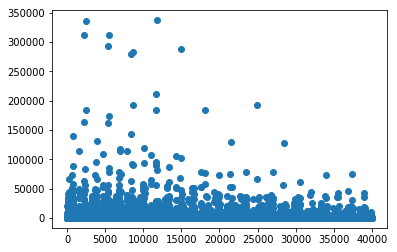

In [28]:
plt.scatter(range(df_model['SO2'].shape[0]), df_model['SO2'])

In [17]:
import statsmodels.api as sms
from sklearn.linear_model import LinearRegression

In [14]:
y = df_model['SO2'].interpolate()
x = df_model.drop('SO2',axis=1).interpolate()
model = LinearRegression()
model.fit(x,y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
print(model.coef_)
print(model.intercept_)

[-3.25094944e+01 -2.34841489e-01 -3.73804827e-01  8.11073044e-03
  1.14716483e-01 -3.58750065e-02 -2.29478220e-02  1.36379350e+00
  7.23201197e+00]
65397.85567073443
